In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/yelderiny/Projects/Dissertation/Data/project-data3.csv', index_col=[0])

In [3]:
df.head()

,name,language,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
Unnamed: 0,,,,,,,,,,,,
0,kdn251/interviews,Java,40,24091,28,564,2.020,1.985,1.902,2.271,2.389,2.377
0,crossoverJie/JCSprout,Java,69,1188,23,478,3.172,2.960,2.070,3.390,3.318,2.749
0,linlinjava/litemall,Java,96,24595,60,1955,4.279,3.977,3.149,4.006,3.668,3.544
0,winterbe/java8-tutorial,Java,10,149,11,1248,2.217,2.098,1.655,3.281,2.569,3.257
0,justauth/JustAuth,Java,25,9554,34,1284,1.928,1.850,1.617,4.867,4.833,5.186


In [4]:
df.describe()

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
count,2015.000000,2.015000e+03,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
mean,412.947891,5.097059e+04,95.955335,2130.096774,4.102980,3.879929,3.228518,6.726139,5.894445,6.667275
std,1244.758781,2.126539e+05,112.315376,1126.855249,2.889037,2.665830,1.938678,6.510062,5.364833,6.238397
min,2.000000,2.900000e+01,0.000000,5.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.058000e+03,18.000000,1278.500000,2.102000,2.037000,1.844500,2.729000,2.543500,2.742000
50%,98.000000,7.964000e+03,48.000000,2037.000000,3.221000,3.077000,2.675000,4.588000,4.186000,4.556000
75%,303.000000,2.635450e+04,129.000000,2895.500000,5.063500,4.779500,4.047500,8.327500,7.156500,8.411000
max,28015.000000,4.301890e+06,479.000000,5665.000000,24.187000,22.082000,14.901000,74.159000,52.785000,59.130000


In [5]:
df.isna().sum()

name               0
language           0
pull_requests      0
size               0
contributors       0
age                0
contributor_xp1    0
contributor_xp2    0
contributor_xp3    0
pr_points1         0
pr_points2         0
pr_points3         0
dtype: int64

In [6]:
corrs = df.drop(['name', 'language'], axis=1)
corrs.corr(method='pearson')

,pull_requests,size,contributors,age,contributor_xp1,contributor_xp2,contributor_xp3,pr_points1,pr_points2,pr_points3
pull_requests,1.000000,0.346338,0.503348,0.160774,0.342698,0.351890,0.398337,0.564590,0.541812,0.504881
size,0.346338,1.000000,0.240507,0.014722,0.163115,0.170751,0.198137,0.193546,0.185603,0.161686
contributors,0.503348,0.240507,1.000000,0.259555,0.654875,0.663001,0.706104,0.530775,0.528849,0.497232
age,0.160774,0.014722,0.259555,1.000000,0.221481,0.221655,0.246228,0.181334,0.178664,0.186414
contributor_xp1,0.342698,0.163115,0.654875,0.221481,1.000000,0.999088,0.949784,0.373682,0.378230,0.355099
contributor_xp2,0.351890,0.170751,0.663001,0.221655,0.999088,1.000000,0.958507,0.383586,0.387917,0.363864
contributor_xp3,0.398337,0.198137,0.706104,0.246228,0.949784,0.958507,1.000000,0.434161,0.438992,0.408716
pr_points1,0.564590,0.193546,0.530775,0.181334,0.373682,0.383586,0.434161,1.000000,0.981436,0.958020
pr_points2,0.541812,0.185603,0.528849,0.178664,0.378230,0.387917,0.438992,0.981436,1.000000,0.933690
pr_points3,0.504881,0.161686,0.497232,0.186414,0.355099,0.363864,0.408716,0.958020,0.933690,1.000000


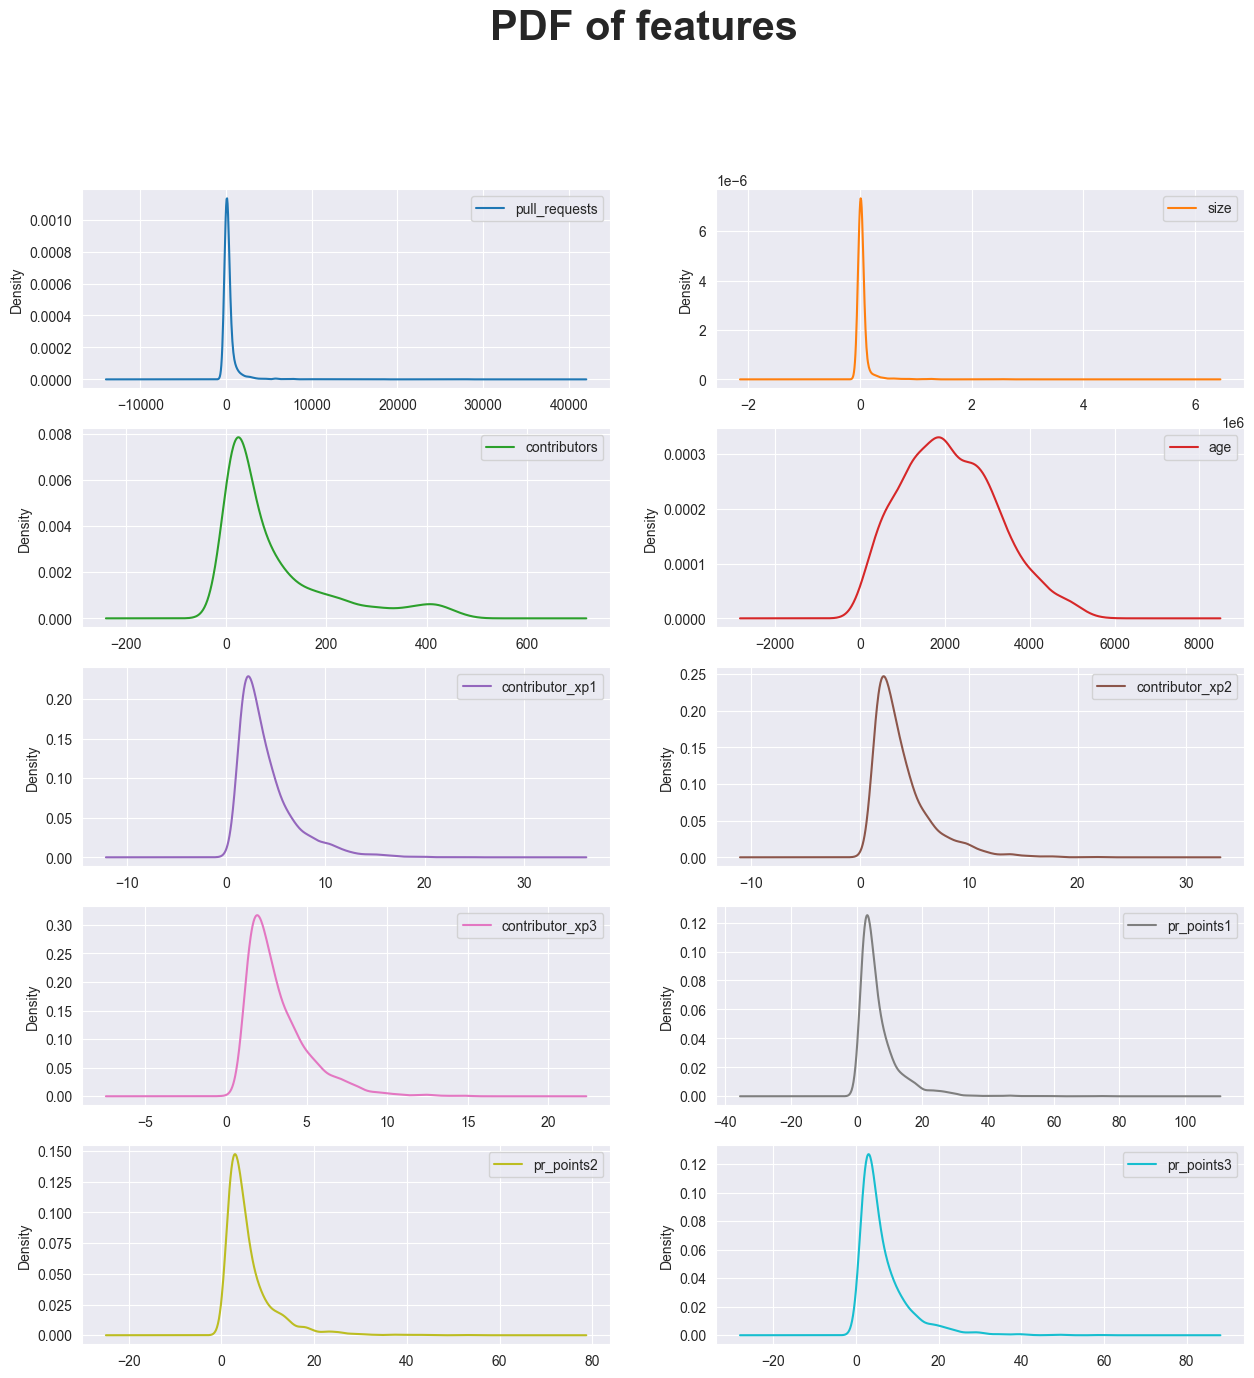

In [7]:
corrs.plot(kind='density', subplots=True, layout=(5,2), fontsize=10, sharex=False, figsize=(15,15))
plt.suptitle('PDF of features', y=1.00, fontweight='bold', fontsize=30)
plt.show()

In [8]:
# import matplotlib.pyplot as plt
# 
# # Iterate over each column of the DataFrame
# for column in corrs.columns:
#     # Calculate x_min and x_max relative to the values in the current column
#     x_min = corrs[column].quantile(0.00)  # Adjust the percentile as needed
#     x_max = corrs[column].quantile(0.99)  # Adjust the percentile as needed
#     
#     # Plot the PDF for the current column
#     ax = corrs[column].plot(kind='density', fontsize=10, figsize=(8, 6))
#     
#     # Add title and labels
#     plt.title(f'PDF of {column}', fontsize=14)
#     plt.xlabel('Values', fontsize=12)
#     plt.ylabel('Density', fontsize=12)
#     
#     # Set the x-axis limits for the current column
#     ax.set_xlim(x_min, x_max)
#     
#     # Show the plot for the current column
#     plt.show()

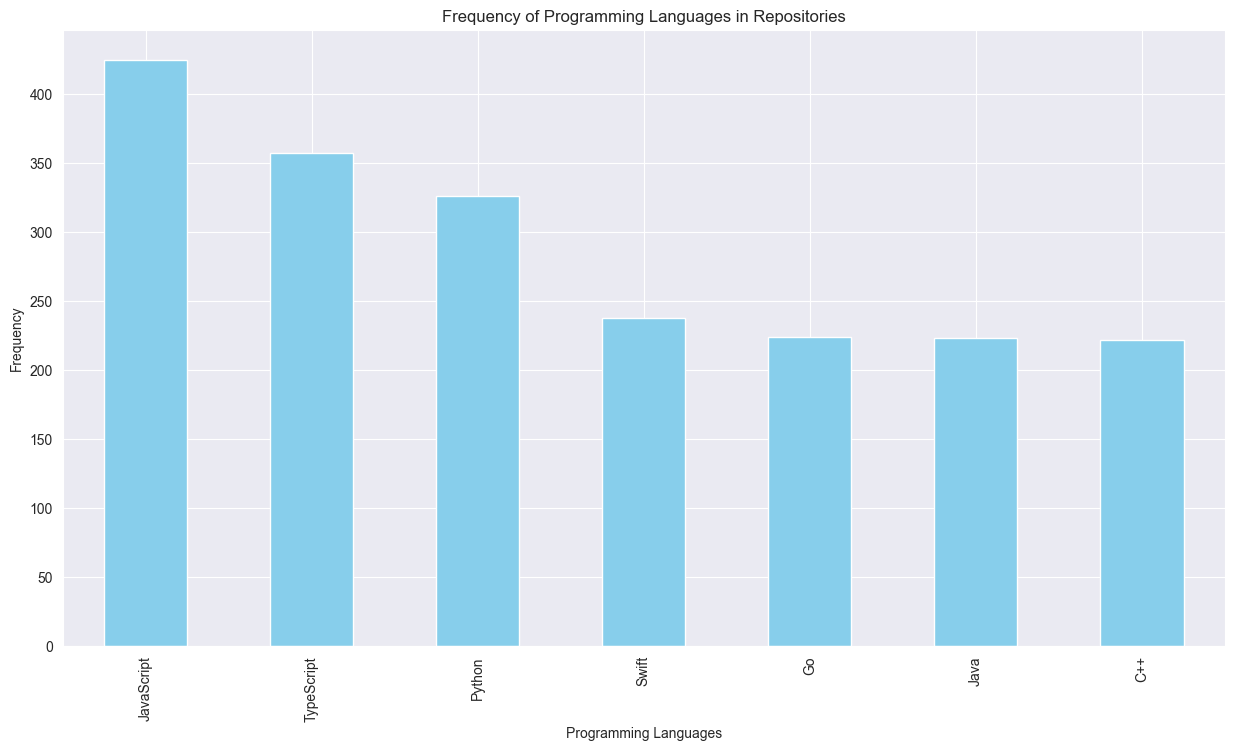

In [9]:
language_counts = df['language'].value_counts()
plt.figure(figsize=(15, 8))
language_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Programming Languages in Repositories')
plt.xlabel('Programming Languages')
plt.ylabel('Frequency')
plt.show()

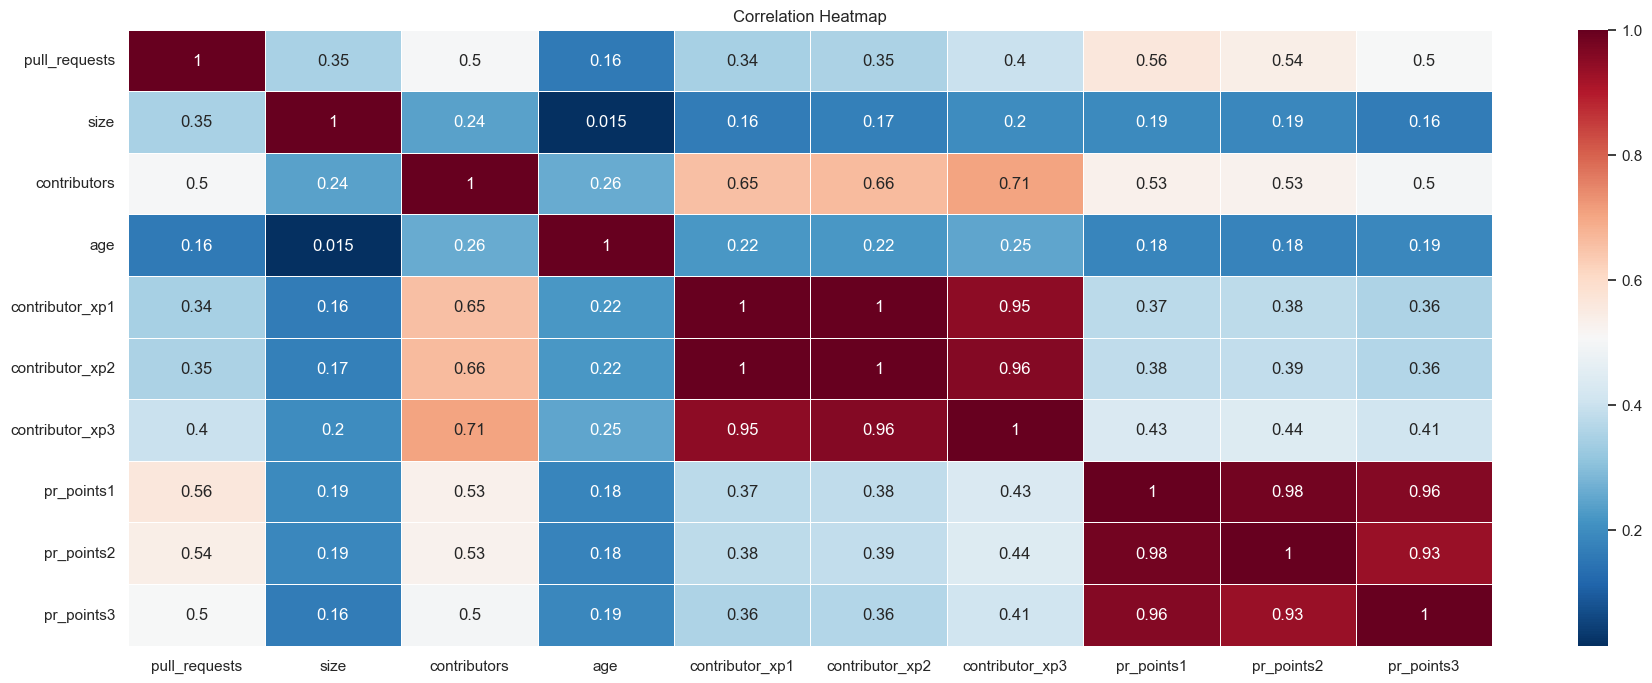

In [10]:
sns.set(style='whitegrid')
plt.figure(figsize=(22,8))
sns.heatmap(corrs.corr(), annot=True, cmap='RdBu_r', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

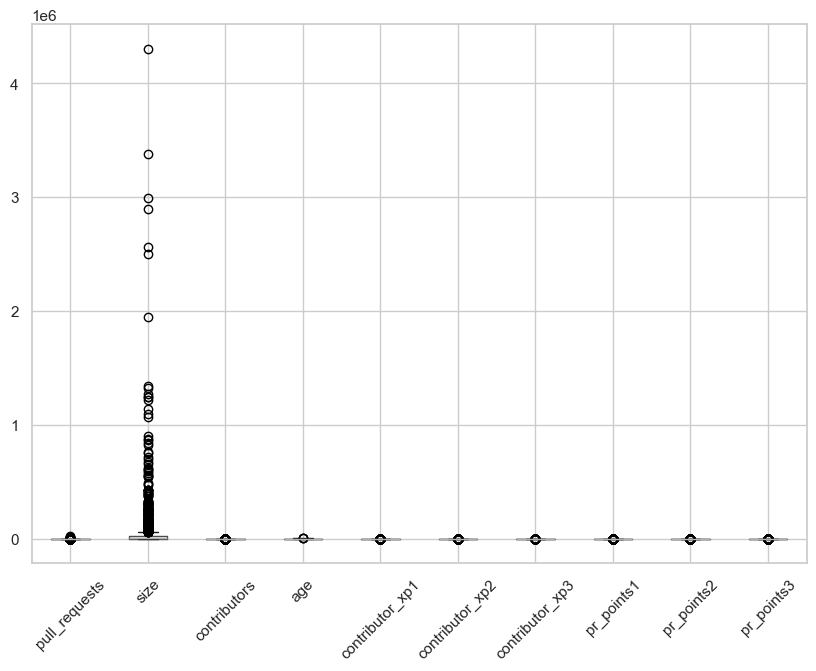

In [11]:
corrs.boxplot(figsize=(10,7), rot=45)
plt.show()